## Credit Card Lead Prediction

Happy Customer Bank is a mid-sized private bank that deals in all kinds of banking products, like Savings accounts, Current accounts, investment products, credit products, among other offerings.
<br>
<br>
The bank also cross-sells products to its existing customers and to do so they use different kinds of communication like tele-calling, e-mails, recommendations on net banking, mobile banking, etc. 
<br>
<br>
In this case, the Happy Customer Bank wants to cross sell its credit cards to its existing customers. The bank has identified a set of customers that are eligible for taking these credit cards.
<br>
<br>
Now, the bank is looking for your help in identifying customers that could show higher intent towards a recommended credit card, given:
- Customer details (gender, age, region etc.)
- Details of his/her relationship with the bank (Channel_Code,Vintage, 'Avg_Asset_Value etc.)

In [1]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.metrics import accuracy_score, roc_auc_score

In [3]:
credit = pd.read_csv("D:/Hackathon/Analytics Vidhya/Joba-thon_2/Data/train_s3TEQDk.csv")
credit.head(10)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0
5,ACUTYTWS,Male,56,RG261,Self_Employed,X1,32,No,544163,Yes,0
6,ETQCZFEJ,Male,62,RG282,Other,X3,20,NaN,1056750,Yes,1
7,JJNJUQMQ,Female,48,RG265,Self_Employed,X3,13,No,444724,Yes,0
8,ZMQFYKCB,Female,40,RG283,Self_Employed,X2,38,No,1274284,No,0
9,NVKTFBA2,Female,55,RG268,Self_Employed,X2,49,Yes,2014239,No,0


## 1. Data Understanding

In [4]:
credit.shape

(245725, 11)

In [5]:
credit.ID.nunique()

245725

In [6]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
ID                     245725 non-null object
Gender                 245725 non-null object
Age                    245725 non-null int64
Region_Code            245725 non-null object
Occupation             245725 non-null object
Channel_Code           245725 non-null object
Vintage                245725 non-null int64
Credit_Product         216400 non-null object
Avg_Account_Balance    245725 non-null int64
Is_Active              245725 non-null object
Is_Lead                245725 non-null int64
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [7]:
credit.describe()

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,245725.000000,245725.000000,2.457250e+05,245725.000000
mean,43.856307,46.959141,1.128403e+06,0.237208
std,14.828672,32.353136,8.529364e+05,0.425372
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.043100e+05,0.000000
50%,43.000000,32.000000,8.946010e+05,0.000000
75%,54.000000,73.000000,1.366666e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


In [8]:
round(100*(credit.Is_Lead.value_counts()/len(credit.index)),2)

0    76.28
1    23.72
Name: Is_Lead, dtype: float64

## 2. Data Cleaning

### Checking Null Values

In [9]:
round(100*credit.isnull().sum()/len(credit.index),2)

ID                      0.00
Gender                  0.00
Age                     0.00
Region_Code             0.00
Occupation              0.00
Channel_Code            0.00
Vintage                 0.00
Credit_Product         11.93
Avg_Account_Balance     0.00
Is_Active               0.00
Is_Lead                 0.00
dtype: float64

__ Dropping rows having null values in 'Credit_Product' column will further make data imbalance, So we are imputing 'Unknown' inplace of Null values__

In [10]:
credit.Credit_Product.fillna(value='Unknown',inplace=True)

In [11]:
round(100*credit.isnull().sum()/len(credit.index),2)

ID                     0.0
Gender                 0.0
Age                    0.0
Region_Code            0.0
Occupation             0.0
Channel_Code           0.0
Vintage                0.0
Credit_Product         0.0
Avg_Account_Balance    0.0
Is_Active              0.0
Is_Lead                0.0
dtype: float64

## 3. Exploratory Data Analysis

In [12]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
ID                     245725 non-null object
Gender                 245725 non-null object
Age                    245725 non-null int64
Region_Code            245725 non-null object
Occupation             245725 non-null object
Channel_Code           245725 non-null object
Vintage                245725 non-null int64
Credit_Product         245725 non-null object
Avg_Account_Balance    245725 non-null int64
Is_Active              245725 non-null object
Is_Lead                245725 non-null int64
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [13]:
credit.head(10)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0
5,ACUTYTWS,Male,56,RG261,Self_Employed,X1,32,No,544163,Yes,0
6,ETQCZFEJ,Male,62,RG282,Other,X3,20,Unknown,1056750,Yes,1
7,JJNJUQMQ,Female,48,RG265,Self_Employed,X3,13,No,444724,Yes,0
8,ZMQFYKCB,Female,40,RG283,Self_Employed,X2,38,No,1274284,No,0
9,NVKTFBA2,Female,55,RG268,Self_Employed,X2,49,Yes,2014239,No,0


#### Gender Column

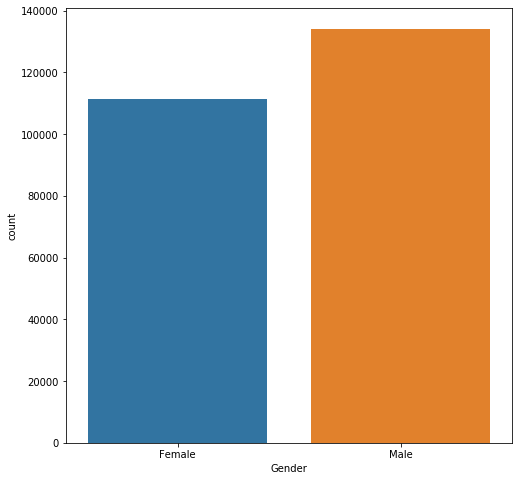

In [14]:
plt.figure(figsize=(8,8))
sns.countplot(x = 'Gender',data = credit)
plt.show()

In [15]:
credit.Gender.value_counts()

Male      134197
Female    111528
Name: Gender, dtype: int64

#### Age Column

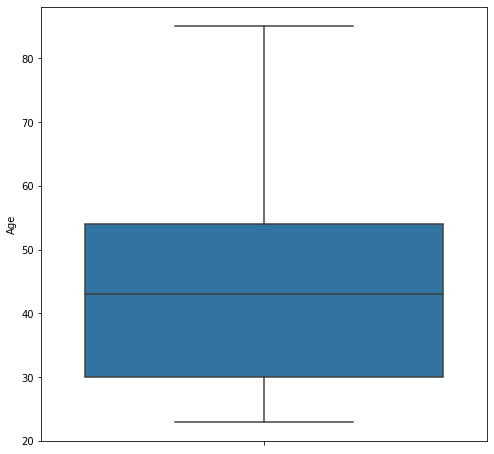

In [16]:
plt.figure(figsize=(8,8))
sns.boxplot(y = 'Age', data=credit)
plt.show()

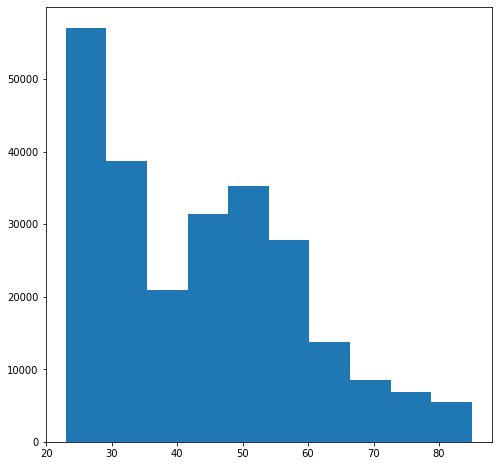

In [17]:
plt.figure(figsize=(8,8))
plt.hist(x = 'Age',data=credit)
plt.show()

#### Region_Code column

In [18]:
credit.Region_Code.value_counts()

RG268    35934
RG283    29416
RG254    26840
RG284    19320
RG277    12826
RG280    12775
RG269     7863
RG270     7720
RG261     7633
RG257     6101
RG251     5950
RG282     5829
RG274     5286
RG272     5252
RG281     5093
RG273     4497
RG252     4286
RG279     3976
RG263     3687
RG275     3245
RG260     3110
RG256     2847
RG264     2793
RG276     2764
RG259     2586
RG250     2496
RG255     2018
RG258     1951
RG253     1858
RG278     1822
RG262     1788
RG266     1578
RG265     1546
RG271     1542
RG267     1497
Name: Region_Code, dtype: int64

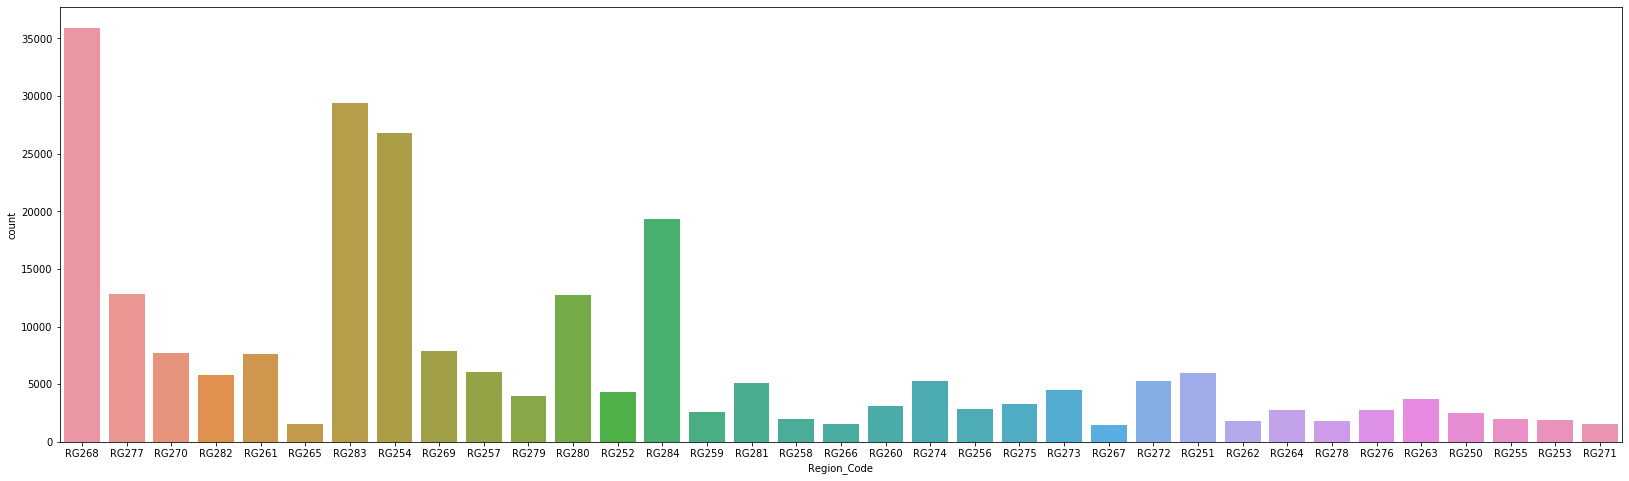

In [19]:
plt.figure(figsize=(28,8))
sns.countplot(x = 'Region_Code',data = credit)
plt.show()

#### Occupation column

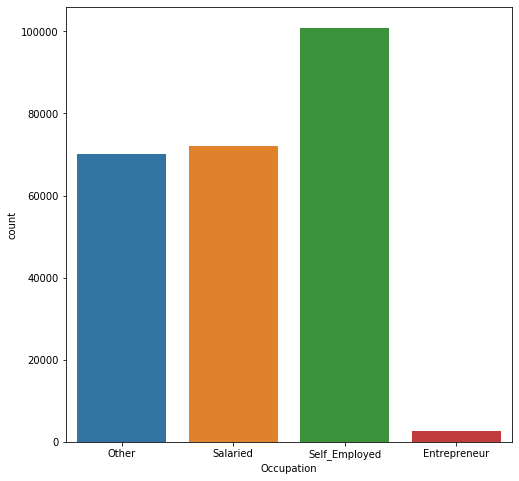

In [20]:
plt.figure(figsize=(8,8))
sns.countplot(x = 'Occupation',data = credit)
plt.show()

#### Channel_Code column

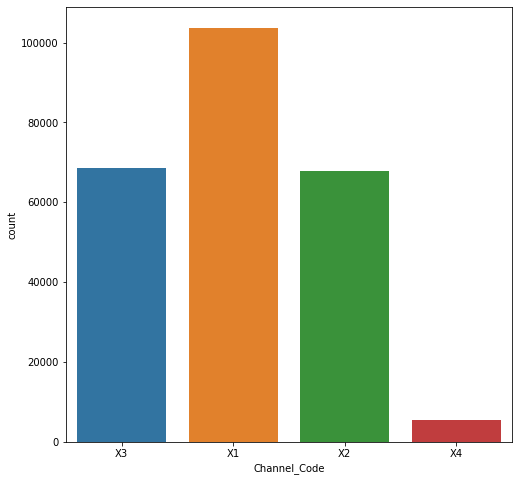

In [21]:
plt.figure(figsize=(8,8))
sns.countplot(x = 'Channel_Code',data = credit)
plt.show()

#### Vintage column

In [22]:
credit.Vintage.agg(['min','max'])

min      7
max    135
Name: Vintage, dtype: int64

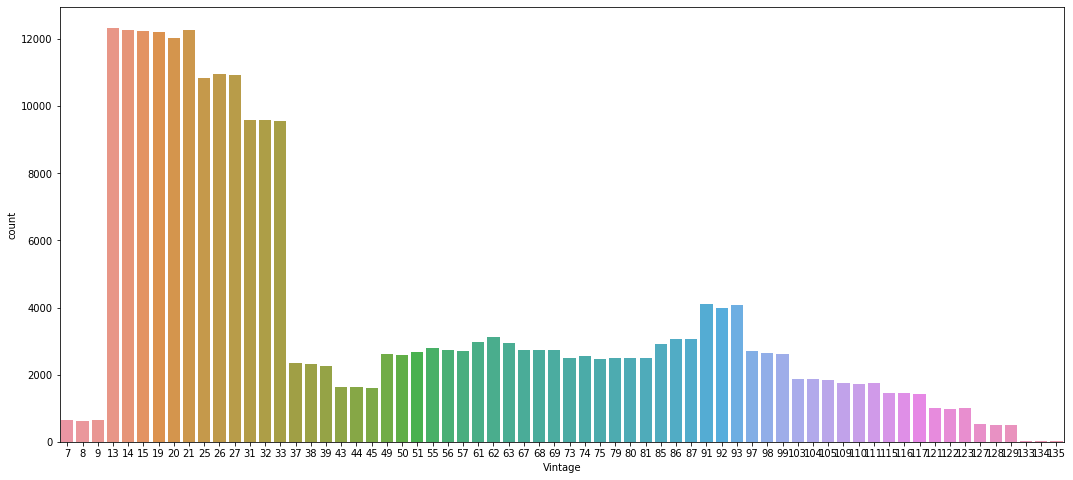

In [23]:
plt.figure(figsize=(18,8))
sns.countplot(x = 'Vintage',data = credit)
plt.show()

#### Credit_Product column

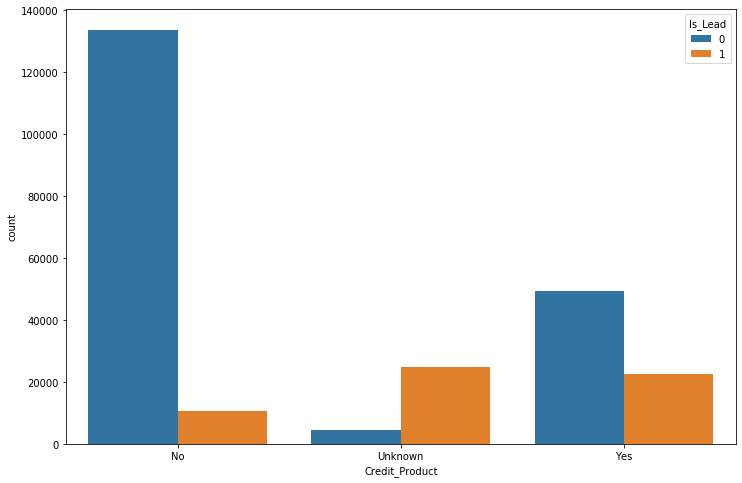

In [24]:
plt.figure(figsize=(12,8))
sns.countplot(x = 'Credit_Product',hue = 'Is_Lead', data = credit)
plt.show()

#### Avg_Account_Balance column

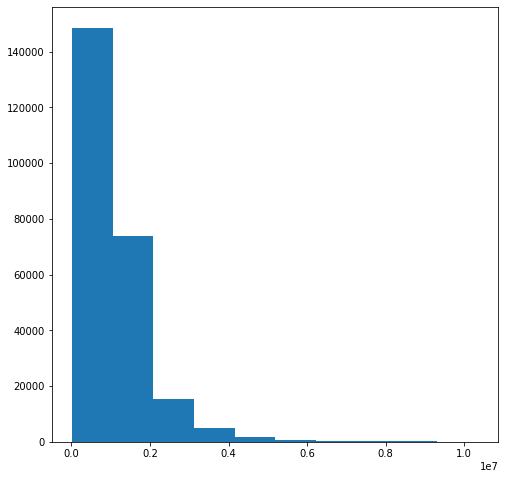

In [25]:
plt.figure(figsize=(8,8))
plt.hist(x = 'Avg_Account_Balance',data = credit)
plt.show()

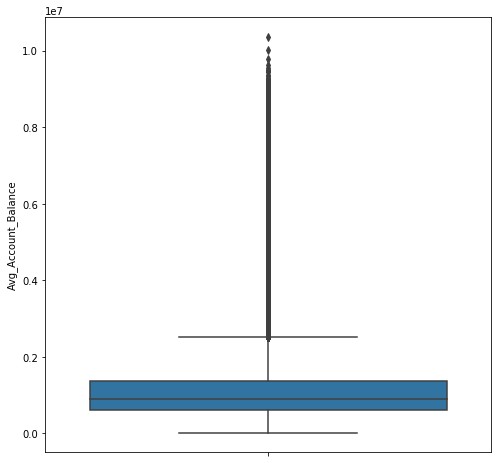

In [26]:
plt.figure(figsize=(8,8))
sns.boxplot(y = 'Avg_Account_Balance', data=credit)
plt.show()

#### Is_Active column

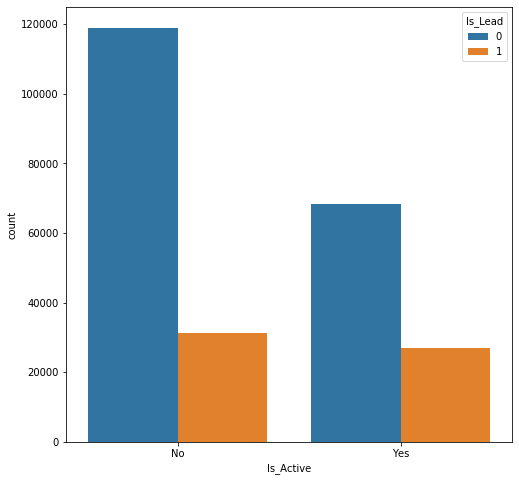

In [27]:
plt.figure(figsize=(8,8))
sns.countplot(x = 'Is_Active',hue= 'Is_Lead',data = credit)
plt.show()

In [28]:
credit.shape

(245725, 11)

In [29]:
credit.Avg_Account_Balance.agg(['min','max'])

min       20790
max    10352009
Name: Avg_Account_Balance, dtype: int64

## 4. Data Preparation

In [30]:
credit.head(5)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


### Dummy Variable Creation

In [31]:
credit.reset_index(inplace=True)
print(credit.shape)
credit.head(5)

(245725, 12)


,index,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [32]:
cat_col = ['index','Gender','Region_Code','Occupation','Channel_Code','Credit_Product','Is_Active']
cat_col_df = credit[cat_col]
cat_col_df.head()

,index,Gender,Region_Code,Occupation,Channel_Code,Credit_Product,Is_Active
0,0,Female,RG268,Other,X3,No,No
1,1,Female,RG277,Salaried,X1,No,No
2,2,Female,RG268,Self_Employed,X3,No,Yes
3,3,Male,RG270,Salaried,X1,No,No
4,4,Female,RG282,Salaried,X1,No,No


In [33]:
cat_col_dummy = pd.get_dummies(cat_col_df, drop_first=True)
print(cat_col_dummy.shape)
cat_col_dummy.head(5)

(245725, 45)


,index,Gender_Male,Region_Code_RG251,Region_Code_RG252,Region_Code_RG253,Region_Code_RG254,Region_Code_RG255,Region_Code_RG256,Region_Code_RG257,Region_Code_RG258,...,Region_Code_RG284,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_Unknown,Credit_Product_Yes,Is_Active_Yes
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
3,3,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [34]:
credit_data = pd.merge(credit, cat_col_dummy, on = 'index')
print(credit_data.shape)
credit_data.head(5)

(245725, 56)


,index,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,...,Region_Code_RG284,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_Unknown,Credit_Product_Yes,Is_Active_Yes
0,0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,...,0,1,0,0,0,1,0,0,0,0
1,1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,...,0,0,1,0,0,0,0,0,0,0
2,2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,...,0,0,0,1,0,1,0,0,0,1
3,3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,...,0,0,1,0,0,0,0,0,0,0
4,4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,...,0,0,1,0,0,0,0,0,0,0


#### Removing original categorical columns for which dummy variables are created

In [35]:
credit_data = credit_data.drop(columns=cat_col)
print(credit_data.shape)
credit_data.head()

(245725, 49)


,ID,Age,Vintage,Avg_Account_Balance,Is_Lead,Gender_Male,Region_Code_RG251,Region_Code_RG252,Region_Code_RG253,Region_Code_RG254,...,Region_Code_RG284,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_Unknown,Credit_Product_Yes,Is_Active_Yes
0,NNVBBKZB,73,43,1045696,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,IDD62UNG,30,32,581988,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,HD3DSEMC,56,26,1484315,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
3,BF3NC7KV,34,19,470454,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,TEASRWXV,30,33,886787,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


#### Dropping columns not needed for model building

In [36]:
credit_data = credit_data.drop(columns=['ID'])

In [37]:
credit_data.shape

(245725, 48)

In [38]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245725 entries, 0 to 245724
Data columns (total 48 columns):
Age                         245725 non-null int64
Vintage                     245725 non-null int64
Avg_Account_Balance         245725 non-null int64
Is_Lead                     245725 non-null int64
Gender_Male                 245725 non-null uint8
Region_Code_RG251           245725 non-null uint8
Region_Code_RG252           245725 non-null uint8
Region_Code_RG253           245725 non-null uint8
Region_Code_RG254           245725 non-null uint8
Region_Code_RG255           245725 non-null uint8
Region_Code_RG256           245725 non-null uint8
Region_Code_RG257           245725 non-null uint8
Region_Code_RG258           245725 non-null uint8
Region_Code_RG259           245725 non-null uint8
Region_Code_RG260           245725 non-null uint8
Region_Code_RG261           245725 non-null uint8
Region_Code_RG262           245725 non-null uint8
Region_Code_RG263           245725 non-

### Correlation

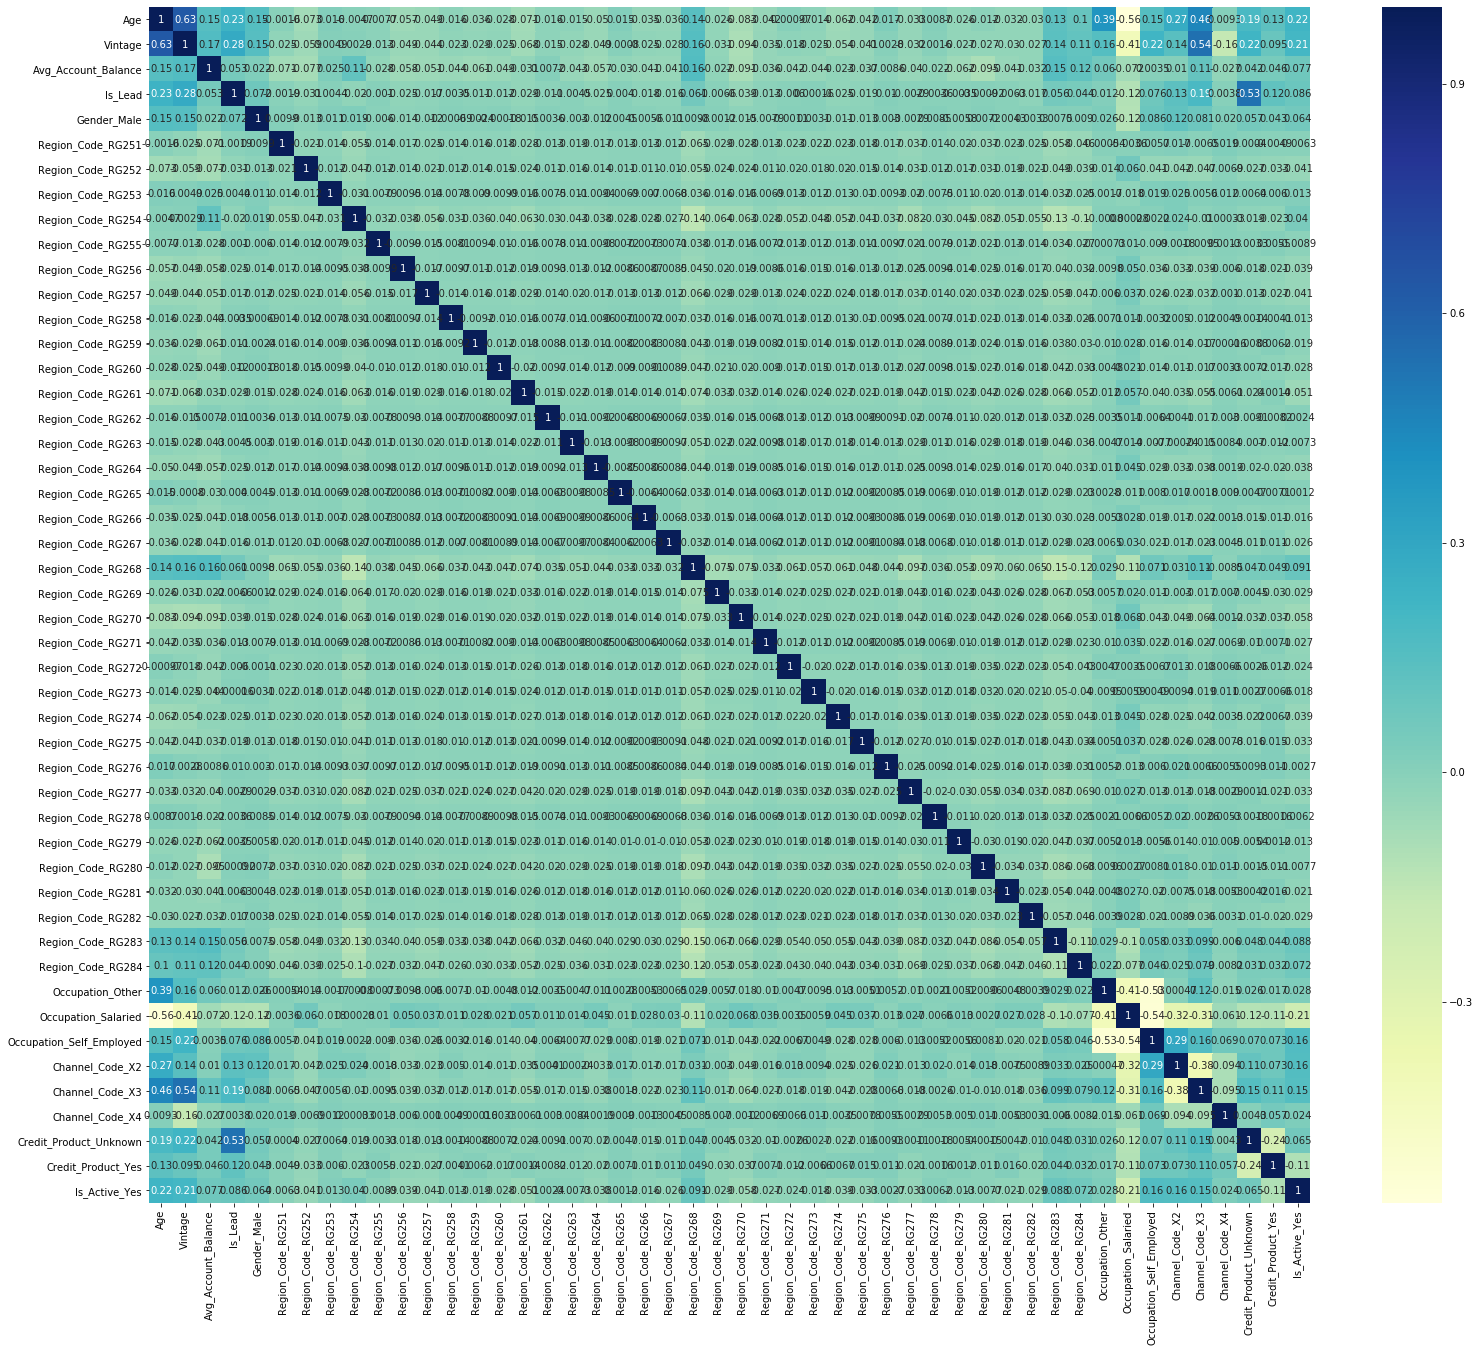

In [39]:
plt.figure(figsize=(26,22))
sns.heatmap(credit_data.corr(), cmap = 'YlGnBu', annot=True)
plt.show()

### Standardiation

In [40]:
credit_data.head()

,Age,Vintage,Avg_Account_Balance,Is_Lead,Gender_Male,Region_Code_RG251,Region_Code_RG252,Region_Code_RG253,Region_Code_RG254,Region_Code_RG255,...,Region_Code_RG284,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_Unknown,Credit_Product_Yes,Is_Active_Yes
0,73,43,1045696,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,30,32,581988,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,56,26,1484315,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
3,34,19,470454,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,30,33,886787,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [41]:
# Importing libraries for Standardization
from sklearn.preprocessing import StandardScaler

In [42]:
scaler = StandardScaler()

credit_data[['Age','Vintage','Avg_Account_Balance']] = scaler.fit_transform(credit_data[['Age','Vintage','Avg_Account_Balance']])
credit_data.head()

,Age,Vintage,Avg_Account_Balance,Is_Lead,Gender_Male,Region_Code_RG251,Region_Code_RG252,Region_Code_RG253,Region_Code_RG254,Region_Code_RG255,...,Region_Code_RG284,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_Unknown,Credit_Product_Yes,Is_Active_Yes
0,1.965365,-0.122373,-0.096968,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,-0.934429,-0.462372,-0.640630,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0.818935,-0.647825,0.417279,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
3,-0.664680,-0.864188,-0.771395,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,-0.934429,-0.431463,-0.283276,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


### Train Test Split

In [43]:
credit_data.head()

,Age,Vintage,Avg_Account_Balance,Is_Lead,Gender_Male,Region_Code_RG251,Region_Code_RG252,Region_Code_RG253,Region_Code_RG254,Region_Code_RG255,...,Region_Code_RG284,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_Unknown,Credit_Product_Yes,Is_Active_Yes
0,1.965365,-0.122373,-0.096968,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,-0.934429,-0.462372,-0.640630,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0.818935,-0.647825,0.417279,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
3,-0.664680,-0.864188,-0.771395,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,-0.934429,-0.431463,-0.283276,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [44]:
X = credit_data.drop(['Is_Lead'], axis=1)
X.head()

,Age,Vintage,Avg_Account_Balance,Gender_Male,Region_Code_RG251,Region_Code_RG252,Region_Code_RG253,Region_Code_RG254,Region_Code_RG255,Region_Code_RG256,...,Region_Code_RG284,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_Unknown,Credit_Product_Yes,Is_Active_Yes
0,1.965365,-0.122373,-0.096968,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,-0.934429,-0.462372,-0.640630,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0.818935,-0.647825,0.417279,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
3,-0.664680,-0.864188,-0.771395,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,-0.934429,-0.431463,-0.283276,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [45]:
y = credit_data['Is_Lead']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Is_Lead, dtype: int64

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 100)

## 5. Model Building

In [48]:
from sklearn.metrics import accuracy_score, roc_auc_score

In [49]:
# Importing RFE and LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

In [50]:
rfe = RFE(logreg, 40)             
rfe = rfe.fit(X_train, y_train)

In [51]:
col = X_train.columns[rfe.support_]
col

Index(['Age', 'Vintage', 'Gender_Male', 'Region_Code_RG251',
       'Region_Code_RG252', 'Region_Code_RG255', 'Region_Code_RG256',
       'Region_Code_RG257', 'Region_Code_RG258', 'Region_Code_RG259',
       'Region_Code_RG263', 'Region_Code_RG264', 'Region_Code_RG265',
       'Region_Code_RG266', 'Region_Code_RG267', 'Region_Code_RG268',
       'Region_Code_RG269', 'Region_Code_RG270', 'Region_Code_RG271',
       'Region_Code_RG272', 'Region_Code_RG273', 'Region_Code_RG275',
       'Region_Code_RG276', 'Region_Code_RG277', 'Region_Code_RG278',
       'Region_Code_RG279', 'Region_Code_RG280', 'Region_Code_RG281',
       'Region_Code_RG282', 'Region_Code_RG283', 'Region_Code_RG284',
       'Occupation_Other', 'Occupation_Salaried', 'Occupation_Self_Employed',
       'Channel_Code_X2', 'Channel_Code_X3', 'Channel_Code_X4',
       'Credit_Product_Unknown', 'Credit_Product_Yes', 'Is_Active_Yes'],
      dtype='object')

In [52]:
X_train = X_train[col]
X_test = X_test[col]

In [53]:
print(X_train.shape)
X_train.columns

(172007, 40)


Index(['Age', 'Vintage', 'Gender_Male', 'Region_Code_RG251',
       'Region_Code_RG252', 'Region_Code_RG255', 'Region_Code_RG256',
       'Region_Code_RG257', 'Region_Code_RG258', 'Region_Code_RG259',
       'Region_Code_RG263', 'Region_Code_RG264', 'Region_Code_RG265',
       'Region_Code_RG266', 'Region_Code_RG267', 'Region_Code_RG268',
       'Region_Code_RG269', 'Region_Code_RG270', 'Region_Code_RG271',
       'Region_Code_RG272', 'Region_Code_RG273', 'Region_Code_RG275',
       'Region_Code_RG276', 'Region_Code_RG277', 'Region_Code_RG278',
       'Region_Code_RG279', 'Region_Code_RG280', 'Region_Code_RG281',
       'Region_Code_RG282', 'Region_Code_RG283', 'Region_Code_RG284',
       'Occupation_Other', 'Occupation_Salaried', 'Occupation_Self_Employed',
       'Channel_Code_X2', 'Channel_Code_X3', 'Channel_Code_X4',
       'Credit_Product_Unknown', 'Credit_Product_Yes', 'Is_Active_Yes'],
      dtype='object')

### 1. Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

#### Prediction on Train data

In [56]:
y_train_predict_proba = log_reg.predict_proba(X_train)[:,1]
y_train_predict = log_reg.predict(X_train)

In [57]:
print("ROC_AUC_Score: ",roc_auc_score(y_train, y_train_predict))

print("ROC_AUC_Score: ",roc_auc_score(y_train, y_train_predict_proba))

ROC_AUC_Score:  0.7278644811831197
ROC_AUC_Score:  0.8588114228511288


#### Prediction on Test data

In [59]:
y_test_predict_proba = log_reg.predict_proba(X_test)[:,1]
y_test_predict = log_reg.predict(X_test)

In [60]:
print("ROC_AUC_Score: ",roc_auc_score(y_test, y_test_predict))

print("ROC_AUC_Score: ",roc_auc_score(y_test, y_test_predict_proba))

ROC_AUC_Score:  0.7263906443287165
ROC_AUC_Score:  0.857447571668477


### 2. Decision Tree

In [63]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

#### Prediction on Train data

In [65]:
dt_y_train_predict_proba = dt.predict_proba(X_train)[:,1]
dt_y_train_predict = dt.predict(X_train)

In [66]:
print("ROC_AUC_Score: ",roc_auc_score(y_train, dt_y_train_predict))

print("ROC_AUC_Score: ",roc_auc_score(y_train, dt_y_train_predict_proba))

ROC_AUC_Score:  0.9402212539841034
ROC_AUC_Score:  0.9963316787851837


#### Prediction on Test data

In [68]:
dt_y_test_predict_proba = dt.predict_proba(X_test)[:,1]
dt_y_test_predict = dt.predict(X_test)

In [69]:
print("ROC_AUC_Score: ",roc_auc_score(y_test, dt_y_test_predict))

print("ROC_AUC_Score: ",roc_auc_score(y_test, dt_y_test_predict_proba))

ROC_AUC_Score:  0.7139086848210676
ROC_AUC_Score:  0.7062401414225926


We can clearly see that it is __Decision Tree model is Overfitting__. We can perform Hyperparameter Tuning

#### Hyper-parameter Tuning for Decision Tree Model

In [72]:
from sklearn.model_selection import GridSearchCV

In [73]:
param = {'criterion':['gini','entropy'],
         'max_depth':range(5,15,2),
         'min_samples_split':range(50, 250, 50),
         'min_samples_leaf': range(50, 250, 50)
        }

In [74]:
gridcv_dt = GridSearchCV(dt, param_grid=param, cv = 5, n_jobs=-1, scoring='roc_auc')

In [75]:
# gridcv_dt.fit(X_train, y_train)

In [76]:
# print("Best roc_auc:", gridcv_dt.best_score_)
# print("Best parameters:", gridcv_dt.best_params_)

#### Decision Tree Model with best Hyperparameters

In [77]:
dt_clf_ht = DecisionTreeClassifier(criterion='gini',max_depth=9, min_samples_leaf=100, min_samples_split=100)
dt_clf_ht.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=100, min_samples_split=100)

##### Train Dataset Evaluation

In [78]:
# Train dataset prediction and evaluation
gcv_y_train_predict = dt_clf_ht.predict(X_train)
print('Train dataset roc_auc after hyperparameter tuning:',roc_auc_score(y_train, gcv_y_train_predict))

Train dataset roc_auc after hyperparameter tuning: 0.7623450387524044


In [79]:
gcv_y_train_predict_proba = dt_clf_ht.predict_proba(X_train)[:,1]
print('Train dataset prob roc_auc after hyperparameter tuning:',roc_auc_score(y_train, gcv_y_train_predict_proba))

Train dataset prob roc_auc after hyperparameter tuning: 0.8761146210912362


##### Test Dataset Evaluation

In [80]:
# Test dataset prediction and evaluation
gcv_y_test_predict = dt_clf_ht.predict(X_test)
print('Test dataset roc_auc after hyperparameter tuning:', roc_auc_score(y_test, gcv_y_test_predict))

Test dataset roc_auc after hyperparameter tuning: 0.7574212122252884


In [81]:
gcv_y_test_predict_proba = dt_clf_ht.predict_proba(X_test)[:,1]
print('Train dataset prob roc_auc after hyperparameter tuning:',roc_auc_score(y_test, gcv_y_test_predict_proba))

Train dataset prob roc_auc after hyperparameter tuning: 0.8704009234303689


### 3. Random Forest

In [82]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

#### Prediction on Train data

In [83]:
rf_y_train_predict_proba = rf.predict_proba(X_train)[:,1]
rf_y_train_predict = rf.predict(X_train)

In [84]:
print("ROC_AUC_Score: ",roc_auc_score(y_train, rf_y_train_predict))

print("ROC_AUC_Score: ",roc_auc_score(y_train, rf_y_train_predict_proba))

ROC_AUC_Score:  0.9461208415000147
ROC_AUC_Score:  0.9916186790637279


#### Prediction on Test data

In [85]:
rf_y_test_predict_proba = rf.predict_proba(X_test)[:,1]
rf_y_test_predict = rf.predict(X_test)

In [86]:
print("ROC_AUC_Score: ",roc_auc_score(y_test, rf_y_test_predict))

print("ROC_AUC_Score: ",roc_auc_score(y_test, rf_y_test_predict_proba))

ROC_AUC_Score:  0.7451390476846068
ROC_AUC_Score:  0.836018491234872


#### Hyper-parameter Tuning for Decision Tree Model

In [87]:
from sklearn.model_selection import GridSearchCV

In [88]:
param = {'n_estimators' : [100,200,300],
         'criterion' : ["gini", "entropy"],
         'max_depth' : range(2,16,2),
         'min_samples_split' : range(50, 500, 50),
         'min_samples_leaf' : range(50, 500, 50)
        }

In [89]:
# gridcv_rf = GridSearchCV(rf, param_grid=param, cv = 5, n_jobs=-1, scoring='roc_auc')

In [90]:
# gridcv_rf.fit(X_train, y_train)

In [91]:
# print("Best roc_auc:", gridcv_rf.best_score_)
# print("Best parameters:", gridcv_rf.best_params_)

#### Random Forest Model with best Hyperparameters

In [92]:
rf_clf_ht = RandomForestClassifier(n_estimators= 300, criterion = 'gini', max_depth= 12, 
                                     min_samples_leaf= 50, min_samples_split= 350, random_state=42)
rf_clf_ht.fit(X_train, y_train)

RandomForestClassifier(max_depth=12, min_samples_leaf=50, min_samples_split=350,
                       n_estimators=300, random_state=42)

##### Train Dataset Evaluation

In [93]:
# Train dataset prediction and evaluation
gcv_y_train_predict = rf_clf_ht.predict(X_train)
print('Train dataset roc_auc after hyperparameter tuning:',roc_auc_score(y_train, gcv_y_train_predict))

Train dataset roc_auc after hyperparameter tuning: 0.7301004651106131


In [94]:
# Train dataset prediction and evaluation
gcv_y_train_predict_proba = rf_clf_ht.predict_proba(X_train)[:,1]
print('Train dataset roc_auc after hyperparameter tuning:',roc_auc_score(y_train, gcv_y_train_predict_proba))

Train dataset roc_auc after hyperparameter tuning: 0.873744404396408


##### Test Dataset Evaluation

In [95]:
# Test dataset prediction and evaluation
gcv_y_test_predict = rf_clf_ht.predict(X_test)
print('Test dataset roc_auc after hyperparameter tuning:', roc_auc_score(y_test, gcv_y_test_predict))

Test dataset roc_auc after hyperparameter tuning: 0.7262181423014012


In [96]:
# Test dataset prediction and evaluation
gcv_y_test_predict_proba = rf_clf_ht.predict_proba(X_test)[:,1]
print('Test dataset roc_auc after hyperparameter tuning:', roc_auc_score(y_test, gcv_y_test_predict_proba))

Test dataset roc_auc after hyperparameter tuning: 0.8687708827504044


### 4. XGBoost

In [97]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import cross_validate

In [98]:
# XGBoost hyper-parameter tuning
def hyperParameterTuning(X_train, y_train):
    param_tuning = {
        'learning_rate': [0.05, 0.1, 0.2, 0.5],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7, 0.9, 1.0],
        'colsample_bytree': [0.3, 0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['binary:logistic']
    }

    xgb_model = XGBClassifier()

    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(X_train,y_train)

    return gsearch.best_params_

In [99]:
# hyperParameterTuning(X_train, y_train)

In [100]:
xgb_clf = xgb.XGBClassifier(colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, min_child_weight = 3, 
                           n_estimators = 100, objective= 'binary:logistic', subsample=1.0)

In [101]:
xgb_clf.fit(X_train,y_train)

[23:43:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1.0,
              tree_method='exact', validate_parameters=1, verbosity=None)

#### Prediction on Train data

In [102]:
xgb_y_train_predict_proba = xgb_clf.predict_proba(X_train)[:,1]
xgb_y_train_predict = xgb_clf.predict(X_train)

In [103]:
print("ROC_AUC_Score: ",roc_auc_score(y_train, xgb_y_train_predict))

print("ROC_AUC_Score: ",roc_auc_score(y_train, xgb_y_train_predict_proba))

ROC_AUC_Score:  0.7403265618267385
ROC_AUC_Score:  0.8732272511833148


#### Prediction on Test data

In [104]:
xgb_y_test_predict_proba = xgb_clf.predict_proba(X_test)[:,1]
xgb_y_test_predict = xgb_clf.predict(X_test)

In [105]:
print("ROC_AUC_Score: ",roc_auc_score(y_test, xgb_y_test_predict))

print("ROC_AUC_Score: ",roc_auc_score(y_test, xgb_y_test_predict_proba))

ROC_AUC_Score:  0.7352136750965069
ROC_AUC_Score:  0.8691375840698633


### 5. LightGBM

In [106]:
import lightgbm as lgb

In [107]:
lgb_clf = lgb.LGBMClassifier()

In [108]:
lgb_clf.fit(X_train,y_train)

LGBMClassifier()

#### Prediction on Train data

In [109]:
lgb_y_train_predict_proba = lgb_clf.predict_proba(X_train)[:,1]
lgb_y_train_predict = lgb_clf.predict(X_train)

In [110]:
print("ROC_AUC_Score: ",roc_auc_score(y_train, lgb_y_train_predict))

print("ROC_AUC_Score: ",roc_auc_score(y_train, lgb_y_train_predict_proba))

ROC_AUC_Score:  0.7559244878409375
ROC_AUC_Score:  0.8814826129686042


#### Prediction on Test data

In [111]:
lgb_y_test_predict_proba = lgb_clf.predict_proba(X_test)[:,1]
lgb_y_test_predict = lgb_clf.predict(X_test)

In [112]:
print("ROC_AUC_Score: ",roc_auc_score(y_test, lgb_y_test_predict))

print("ROC_AUC_Score: ",roc_auc_score(y_test, lgb_y_test_predict_proba))

ROC_AUC_Score:  0.7483679172965217
ROC_AUC_Score:  0.8730503214406129


#### Hyper-parameter Tuning for LightGBM Model

In [113]:
from sklearn.model_selection import GridSearchCV

In [114]:
param = {
#         'n_estimators': [100, 200, 300, 400]
#         'learning_rate': [0.01,0.05, 0.10, 0.20]
#         'colsample_bytree': [0.6, 0.7, 0.8, 0.9]
#         'max_depth': range(4, 40, 4)
#         'num_leaves': range(5, 60, 5)
#         'reg_alpha': [1.1, 1.2, 1.3],
# #         'reg_lambda': [1.1, 1.2, 1.3]
#         'min_split_gain': [0.2,0.3, 0.4],
#         'subsample': [0.6, 0.7, 0.8, 0.9],
#         'subsample_freq': [5, 10, 15, 20]
    }

In [115]:
# gridcv_lgbm = GridSearchCV(lgb_clf, param_grid=param, cv = 5, n_jobs=-1, scoring='roc_auc')

In [116]:
# gridcv_lgbm.fit(X_train, y_train)

In [117]:
# print("Best roc_auc:", gridcv_lgbm.best_score_)
# print("Best parameters:", gridcv_lgbm.best_params_)

#### LGBM Model with best Hyperparameters

In [118]:
lgb_clf_ht = lgb.LGBMClassifier(n_estimators = 100,
                                learning_rate = 0.05,
                                colsample_bytree = 0.7,
                                max_depth = 12,
                                num_leaves = 25,
                                reg_alpha = 1.3,
                                reg_lambda = 1.1,
                                min_split_gain = 0.2,
                                subsample = 0.9,
                                subsample_freq = 5,
                                random_state = 42)

In [119]:
lgb_clf_ht.fit(X_train, y_train)

LGBMClassifier(colsample_bytree=0.7, learning_rate=0.05, max_depth=12,
               min_split_gain=0.2, num_leaves=25, random_state=42,
               reg_alpha=1.3, reg_lambda=1.1, subsample=0.9, subsample_freq=5)

##### Train Dataset Evaluation

In [120]:
# Train dataset prediction and evaluation
gcv_lgb_y_train_predict = lgb_clf_ht.predict(X_train)
print('Train dataset roc_auc after hyperparameter tuning:',roc_auc_score(y_train, gcv_lgb_y_train_predict))

Train dataset roc_auc after hyperparameter tuning: 0.7518072339249999


In [121]:
# Train dataset prediction and evaluation
gcv_lgb_y_train_predict_proba = lgb_clf_ht.predict_proba(X_train)[:,1]
print('Train dataset roc_auc after hyperparameter tuning:',roc_auc_score(y_train, gcv_lgb_y_train_predict_proba))

Train dataset roc_auc after hyperparameter tuning: 0.8763352174657938


##### Test Dataset Evaluation

In [122]:
# Test dataset prediction and evaluation
gcv_lgb_y_test_predict = lgb_clf_ht.predict(X_test)
print('Test dataset roc_auc after hyperparameter tuning:', roc_auc_score(y_test, gcv_lgb_y_test_predict))

Test dataset roc_auc after hyperparameter tuning: 0.746216773023656


In [123]:
# Test dataset prediction and evaluation
gcv_lgb_y_test_predict_proba = lgb_clf_ht.predict_proba(X_test)[:,1]
print('Test dataset roc_auc after hyperparameter tuning:', roc_auc_score(y_test, gcv_lgb_y_test_predict_proba))

Test dataset roc_auc after hyperparameter tuning: 0.8724506534919961


### 6. Stacking - One Layer

In [124]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

import lightgbm as lgb

# Create Learners per layer

base_learner = [    
#                         ('xgb_1', XGBClassifier(colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, 
#                                                 min_child_weight = 3, n_estimators = 100, objective= 'binary:logistic',
#                                                 subsample=1.0))
    
                        ('lgbm_1', lgb.LGBMClassifier(n_estimators = 100,learning_rate = 0.05,
                                                      colsample_bytree = 0.7,max_depth = 12,num_leaves = 25,
                                                      reg_alpha = 1.3, reg_lambda = 1.1, min_split_gain = 0.2,
                                                      subsample = 0.9,subsample_freq = 5,random_state = 42))
    
                       ]

In [125]:
stack_clf_one = StackingClassifier(estimators=base_learner, 
                                   final_estimator=XGBClassifier(colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, 
                                                min_child_weight = 3, n_estimators = 100, objective= 'binary:logistic',
                                                subsample=1.0))

In [126]:
stack_clf_one.fit(X_train, y_train)

[23:43:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


StackingClassifier(estimators=[('lgbm_1',
                                LGBMClassifier(colsample_bytree=0.7,
                                               learning_rate=0.05, max_depth=12,
                                               min_split_gain=0.2,
                                               num_leaves=25, random_state=42,
                                               reg_alpha=1.3, reg_lambda=1.1,
                                               subsample=0.9,
                                               subsample_freq=5))],
                   final_estimator=XGBClassifier(base_score=None, booster=None,
                                                 colsample_bylevel=None,
                                                 colsample_bynode=None,
                                                 colsample_bytree=0.3,
                                                 gamm...
                                                 importance_type='gain',
                            

##### Train Dataset Evaluation

In [129]:
# Train dataset prediction and evaluation
stack_y_train_predict = stack_clf_one.predict(X_train)
print('Train dataset roc_auc after hyperparameter tuning:',roc_auc_score(y_train, stack_y_train_predict))

Train dataset roc_auc after hyperparameter tuning: 0.754519629090291


In [130]:
# Train dataset prediction and evaluation
stack_y_train_predict_proba = stack_clf_one.predict_proba(X_train)[:,1]
print('Train dataset roc_auc after hyperparameter tuning:',roc_auc_score(y_train, stack_y_train_predict_proba))

Train dataset roc_auc after hyperparameter tuning: 0.8756478333486137


##### Test Dataset Evaluation

In [131]:
# # Test dataset prediction and evaluation
stack_y_test_predict = stack_clf_one.predict(X_test)
print('Test dataset roc_auc after hyperparameter tuning:', roc_auc_score(y_test, stack_y_test_predict))

Test dataset roc_auc after hyperparameter tuning: 0.7485065341774066


In [132]:
# Test dataset prediction and evaluation
stack_y_test_predict_proba = stack_clf_one.predict_proba(X_test)[:,1]
print('Test dataset roc_auc after hyperparameter tuning:', roc_auc_score(y_test, stack_y_test_predict_proba))

Test dataset roc_auc after hyperparameter tuning: 0.8721741954339636


## 6. Unseen Data Evaluation

### 1. Data Import

In [133]:
credit_test = pd.read_csv("D:/Hackathon/Analytics Vidhya/Joba-thon_2/Data/test_mSzZ8RL.csv")
credit_test.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [134]:
credit_test.shape

(105312, 10)

In [135]:
round(100*credit_test.isnull().sum()/len(credit_test.index),2)

ID                      0.00
Gender                  0.00
Age                     0.00
Region_Code             0.00
Occupation              0.00
Channel_Code            0.00
Vintage                 0.00
Credit_Product         11.89
Avg_Account_Balance     0.00
Is_Active               0.00
dtype: float64

### 2. Data Cleaning

In [136]:
credit_test.Credit_Product.fillna(value='Unknown',inplace=True)

### 3. Data Preparation

#### 1. Dummy Variable Creation

In [137]:
credit_test.reset_index(inplace=True)
print(credit_test.shape)
credit_test.head(5)

(105312, 11)


,index,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,1,CCMEWNKY,Male,43,RG268,Other,X2,49,Unknown,925537,No
2,2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [138]:
cat_col_test = ['index','Gender','Region_Code','Occupation','Channel_Code','Credit_Product','Is_Active']
cat_col_test_df = credit_test[cat_col_test]
cat_col_test_df.head()

,index,Gender,Region_Code,Occupation,Channel_Code,Credit_Product,Is_Active
0,0,Male,RG254,Other,X1,Yes,No
1,1,Male,RG268,Other,X2,Unknown,No
2,2,Male,RG270,Salaried,X1,No,No
3,3,Male,RG272,Other,X1,No,No
4,4,Female,RG270,Other,X1,No,No


In [139]:
cat_col_test_dummy = pd.get_dummies(cat_col_test_df, drop_first=True)
print(cat_col_test_dummy.shape)
cat_col_test_dummy.head(5)

(105312, 45)


,index,Gender_Male,Region_Code_RG251,Region_Code_RG252,Region_Code_RG253,Region_Code_RG254,Region_Code_RG255,Region_Code_RG256,Region_Code_RG257,Region_Code_RG258,...,Region_Code_RG284,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_Unknown,Credit_Product_Yes,Is_Active_Yes
0,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,1,1,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
2,2,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,3,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [140]:
credit_test_data = pd.merge(credit_test, cat_col_test_dummy, on = 'index')
print(credit_test_data.shape)
credit_test_data.head(5)

(105312, 55)


,index,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,...,Region_Code_RG284,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_Unknown,Credit_Product_Yes,Is_Active_Yes
0,0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,...,0,1,0,0,0,0,0,0,1,0
1,1,CCMEWNKY,Male,43,RG268,Other,X2,49,Unknown,925537,...,0,1,0,0,1,0,0,1,0,0
2,2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,...,0,0,1,0,0,0,0,0,0,0
3,3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,...,0,1,0,0,0,0,0,0,0,0
4,4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,...,0,1,0,0,0,0,0,0,0,0


In [141]:
credit_test_index_id = credit_test_data[['index','ID']]

##### Removing original categorical columns for which dummy variables are created

In [142]:
credit_test_data = credit_test_data.drop(columns=cat_col_test)
print(credit_test_data.shape)
credit_test_data.head()

(105312, 48)


,ID,Age,Vintage,Avg_Account_Balance,Gender_Male,Region_Code_RG251,Region_Code_RG252,Region_Code_RG253,Region_Code_RG254,Region_Code_RG255,...,Region_Code_RG284,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_Unknown,Credit_Product_Yes,Is_Active_Yes
0,VBENBARO,29,25,742366,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
1,CCMEWNKY,43,49,925537,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
2,VK3KGA9M,31,14,215949,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,TT8RPZVC,29,33,868070,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,SHQZEYTZ,29,19,657087,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


##### Dropping columns not needed for model building

In [143]:
credit_test_data = credit_test_data.drop(columns=['ID'])

In [144]:
credit_test_data.head()

,Age,Vintage,Avg_Account_Balance,Gender_Male,Region_Code_RG251,Region_Code_RG252,Region_Code_RG253,Region_Code_RG254,Region_Code_RG255,Region_Code_RG256,...,Region_Code_RG284,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_Unknown,Credit_Product_Yes,Is_Active_Yes
0,29,25,742366,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,43,49,925537,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
2,31,14,215949,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,29,33,868070,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,29,19,657087,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


#### 2. Standardization

In [145]:
credit_test_data[['Age','Vintage','Avg_Account_Balance']] = scaler.transform(credit_test_data[['Age','Vintage',
                                                                                                   'Avg_Account_Balance']])
credit_test_data.head()

,Age,Vintage,Avg_Account_Balance,Gender_Male,Region_Code_RG251,Region_Code_RG252,Region_Code_RG253,Region_Code_RG254,Region_Code_RG255,Region_Code_RG256,...,Region_Code_RG284,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_Unknown,Credit_Product_Yes,Is_Active_Yes
0,-1.001866,-0.678734,-0.452599,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,-0.057747,0.063081,-0.237845,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
2,-0.866992,-1.018733,-1.069782,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,-1.001866,-0.431463,-0.305220,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,-1.001866,-0.864188,-0.552582,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [146]:
credit_test_data.shape

(105312, 47)

### 5. Model Evaluation on Unseen Data

In [147]:
credit_test_index_id.head()

,index,ID
0,0,VBENBARO
1,1,CCMEWNKY
2,2,VK3KGA9M
3,3,TT8RPZVC
4,4,SHQZEYTZ


#### Using Logistic Regression Classifier, predicting on Unseen dataset

In [148]:
credit_test_data = credit_test_data[col]
credit_test_data.head()

,Age,Vintage,Gender_Male,Region_Code_RG251,Region_Code_RG252,Region_Code_RG255,Region_Code_RG256,Region_Code_RG257,Region_Code_RG258,Region_Code_RG259,...,Region_Code_RG284,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_Unknown,Credit_Product_Yes,Is_Active_Yes
0,-1.001866,-0.678734,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,-0.057747,0.063081,1,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
2,-0.866992,-1.018733,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,-1.001866,-0.431463,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,-1.001866,-0.864188,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [149]:
credit_unseen_predict = lgb_clf.predict_proba(credit_test_data)[:,1]
credit_unseen_predict

array([0.04650458, 0.86139128, 0.06221505, ..., 0.05535518, 0.22065575,
       0.046628  ])

In [150]:
# Converting result into dataframe
credit_result = pd.DataFrame(data=credit_unseen_predict, columns=['Is_Lead'])
credit_result.head()

,Is_Lead
0,0.046505
1,0.861391
2,0.062215
3,0.023065
4,0.020481


In [151]:
credit_lead = pd.concat([credit_test_index_id, credit_result],axis=1)
credit_lead = credit_lead.drop(columns=['index'])
credit_lead.head()

,ID,Is_Lead
0,VBENBARO,0.046505
1,CCMEWNKY,0.861391
2,VK3KGA9M,0.062215
3,TT8RPZVC,0.023065
4,SHQZEYTZ,0.020481


In [152]:
credit_lead.to_csv("D:/Hackathon/Analytics Vidhya/Joba-thon_2/Result/Credit_Lead_V12.csv",index=False)